In [1]:
# Create a KNN classifier that achieves 97% accuracy on the MNIST Dataset
# Loading in the MNIST dataset out of many that scikit-learn has to offer
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
# Now we need to create the KNN classifier object and then test a variety of hyperparameters using a grid search(
# or maybe a random search)
X, Y = mnist["data"], mnist["target"]

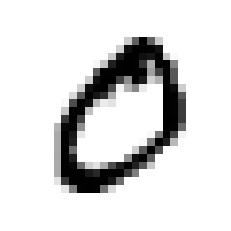

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
X = X.to_numpy()
some_digit = X[1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [4]:
# The label for zero agrees with this image
import numpy as np
# Y = Y.to_numpy().astype(np.uint8)
# or after to_numpy() separately, y = y.astype(np.uint8)
Y[1]

'0'

In [5]:
# We fork off the test set (scikit-learn has the MNIST data set already split [60,000:10,000])
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

In [6]:
# Making the model and then training it
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [11]:
# Looking at the parameters for the KNN classifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
knn_model.get_params().keys()
# Takes way too long. Geron sort of did not think through exercise 1 very well.
# params = [{'n_neighbors': [10, 8, 12], 'weights': ['uniform', 'distance']}]
# grid_search = GridSearchCV(knn_model, params, cv=2, scoring="neg_mean_squared_error", return_train_score="True")
# grid_search.fit(X_train, Y_train)

KeyboardInterrupt: 

In [7]:
# Seeing the accuracy on the test set
from sklearn.model_selection import cross_val_score
cross_val_score(knn_model, X_test, Y_test, cv=6, scoring="accuracy")

array([0.92141572, 0.92981404, 0.92321536, 0.95560888, 0.97238896,
       0.96278511])

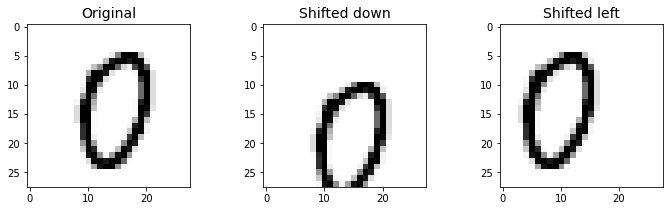

In [16]:
# Now to do the shifting
from scipy.ndimage.interpolation import shift
def shift_image(image, dy, dx):
    image = image.reshape((28, 28))
    # Shift demands the image, [amount shift horizontally, amount shifted vertically], cval(scale value), and mode
    shifted_image = shift(image, [dx, dy], cval=0, mode="constant")
    # Re-expanding it back out to the 784 element array
    return shifted_image.reshape([-1])

image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [13]:
# Now to put the shifted images in the dataset and train on the extended training set
train_set_augmented = [image for image in X_train]
test_set_augmented = [image for image in Y_train]

# Augmenting and appending to a copy of the original training set
for dy, dx in ((0, -1), (0, 1), (1, 0), (-1, 0)):
    for image, label in zip(X_train, Y_train):
        train_set_augmented.append(shift_image(image, dy, dx))
        test_set_augmented.append(label)
        

In [23]:
len(train_set_augmented)

300000

In [25]:
# Training time
knn_model.fit(train_set_augmented, test_set_augmented)

KNeighborsClassifier()

In [26]:
# The score of the cross validation
cross_val_score(knn_model, X_test, Y_test, cv=6, scoring="accuracy")
# Literally not different at all, strange.

array([0.92141572, 0.92981404, 0.92321536, 0.95560888, 0.97238896,
       0.96278511])